In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import sklearn 

# 0. Описание задачи

Данный набор содержит сводку о продаже игр с рейтингами в странах мира на игры различных жанров и запущенных на разных платформах. Так же по таблице можно узнать год создания игры, оценку игры, разработчика и возрастной рейтинг.

# 1. Прочитать данные

In [73]:
url = "vgsales.csv"
data_raw = pd.read_csv(url)

Определим формат переменной data_raw:

In [74]:
type(data_raw)

pandas.core.frame.DataFrame

Выведем выбранный набор данных:

In [75]:
data_raw

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [76]:
print(data_raw.shape)

(16598, 11)


В таблице собержится 16598 строк(объектов) и 11 столбов(признаков).

Посмотрим на признаки таблицы:

In [77]:
data_raw.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Выведем первые и последние строки таблицы:

In [78]:
data_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [79]:
data_raw.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Каждый столбец-признак имеет свое имя:

- 'Name' - название игры
- 'Platform' - платформа, на которой можно пользоваться данной игрой
- 'Year' - год релиза игры 
- 'Cenre' - жанр игры
- 'Publisher' - кем создана игра
- 'NA_Sales,  EU_Sales, JP_Sales, Other_Sales' - продажи в различных странах.
- 'GJ_Sales' - продажи по миру

# 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

Посмотрим информацию по количественным признакам:

In [80]:
data_raw.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей. Нетрудно видеть, что средние значения больше медианы, значит эти признаки примают чаще меньшие значения, чем большие.

Матрица корреляции имеет вид:

In [81]:
data_raw.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


Матрица ковариации имеет вид:

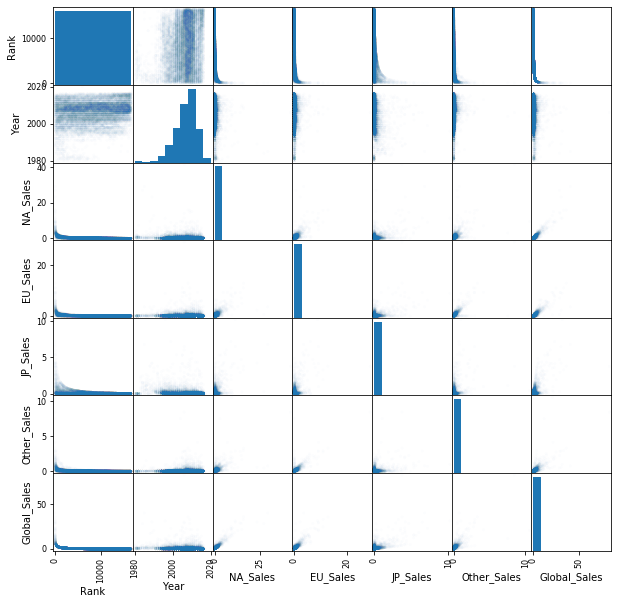

In [93]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

Построим зависимость для признаков Genre и Global_sales:

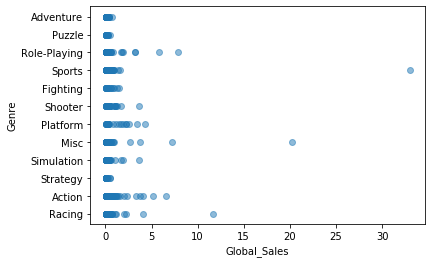

In [114]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Global_Sales'], data_raw.iloc[random_subset]['Genre'], alpha=0.5)
plt.xlabel('Global_Sales')
plt.ylabel('Genre')
pass

По данному графику можно сказать, наибольшую популярность имеют игры жанров Acrion, Misc,Role-Playing.

Проанализируем зависимость данной скидки от года выпуска и от жанра игры. Для этого построим диаграмму рассеивания.

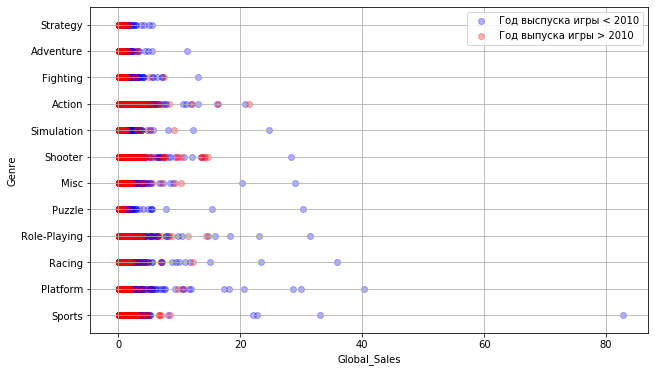

In [117]:
plt.figure(figsize = (10, 6))

plt.scatter(data_raw[data_raw['Year'] < 2010]['Global_Sales'],
            data_raw[data_raw['Year'] < 2010]['Genre'],
            alpha = 0.3,
            label = 'Год выспуска игры < 2010',
            color = 'b')

plt.scatter(data_raw[data_raw['Year'] > 2010]['Global_Sales'],
            data_raw[data_raw['Year'] > 2010]['Genre'],
            alpha = 0.3,
            label = 'Год выпуска игры > 2010',
            color = 'r')

plt.xlabel('Global_Sales')
plt.ylabel('Genre')
plt.legend()
plt.grid()


Из графика видно, что наибольшую стоимость имеют игры с более поздним годом выпуска(2010 и ранее), возможно, это обусловлено тем, что такого рода игры уже становятся эксклюзивом и их практически невозможно нйти на рынке. 

# 3. Обработать пропущенные значения (или убедиться, что их нет)


Найдём медиану по каждому признаку:

In [85]:
data_raw.median(axis = 0)

Rank            8300.50
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
dtype: float64

In [86]:
data_raw[numerical_columns].count(axis = 0)

Rank            16598
Year            16327
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

Как видим у нас отсутствуют данные в столбце "Yеаr", заменим их на медианы.

In [87]:
data_raw = data_raw.fillna(data_raw.median(axis = 0), axis = 0)
data_raw[numerical_columns].count(axis = 0)

Rank            16598
Year            16598
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [88]:
data_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


 # 4. Обработать категориальные признаки
 
Столбцы 'Genre', 'Platform', 'Publisher' содержат категориальные признаки. Пока они имеют тип 'Object'. Заменим его на предназначенный для хранения категориальных значений:

In [89]:
print(data_raw['Genre'].dtype)
print(data_raw['Platform'].dtype)
print(data_raw['Publisher'].dtype)


object
object
object


In [90]:
data_raw['Genre'] = data_raw['Genre'].astype('category')
data_raw['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
                  'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
                  'Sports', 'Strategy'],
                 ordered=False)

In [91]:
data_raw['Platform'] = data_raw['Platform'].astype('category')
data_raw['Platform'].dtype

CategoricalDtype(categories=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN',
                  'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS',
                  'Wii', 'WiiU', 'X360', 'XB', 'XOne'],
                 ordered=False)

In [92]:
data_raw['Publisher'] = data_raw['Publisher'].astype('category')
data_raw['Publisher'].dtype

CategoricalDtype(categories=['10TACLE Studios', '1C Company',
                  '20th Century Fox Video Games', '2D Boy', '3DO', '49Games',
                  '505 Games', '5pb', '7G//AMES', '989 Sports',
                  ...
                  'Zushi Games', 'bitComposer Games', 'dramatic create',
                  'fonfun', 'iWin', 'id Software', 'imageepoch Inc.',
                  'inXile Entertainment', 'mixi, Inc', 'responDESIGN'],
                 ordered=False)

# 5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)

В случае когда входные данные нормализованы, алгоритмы машинного обучения будут работать качественнее. Приведя данные к нулевому среднему значению с единичным квадратичным отклонением, мы получим отмасштабированные данные.

In [97]:
X = data_raw.drop('Genre', axis = 1)
y = data_raw['Genre']
print("x:", X.shape)
print("y:", y.shape)

x: (16598, 10)
y: (16598,)


In [98]:
data_raw

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [99]:
X1 = X.drop('Name', axis = 1)

In [100]:
X2 = X1.drop('Platform', axis = 1)

In [107]:
data = X2.drop('Publisher', axis = 1)

In [108]:
data

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,0.00,0.00,0.00,0.01
16594,16597,2003.0,0.01,0.00,0.00,0.00,0.01
16595,16598,2008.0,0.00,0.00,0.00,0.00,0.01
16596,16599,2010.0,0.00,0.01,0.00,0.00,0.01


In [109]:
data = (data - data.mean(axis = 0))/data.std(axis = 0)

In [110]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04
mean,1.057648e-16,-6.895583e-16,-3.145335e-14,-6.160151e-14,1.270088e-14,4.582867e-14,-5.162491e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732024e+00,-4.568933e+00,-3.240761e-01,-2.901982e-01,-2.514840e-01,-2.548567e-01,-3.391840e-01
25%,-8.659186e-01,-5.908544e-01,-3.240761e-01,-2.901982e-01,-2.514840e-01,-2.548567e-01,-3.070303e-01
50%,-2.196512e-05,1.009853e-01,-2.261189e-01,-2.506217e-01,-2.514840e-01,-2.018312e-01,-2.362920e-01
75%,8.658746e-01,6.198651e-01,-3.020441e-02,-7.252779e-02,-1.221558e-01,-4.275459e-02,-4.336942e-02
max,1.731980e+00,2.349464e+00,5.047899e+01,5.713521e+01,3.279187e+01,5.579313e+01,5.286243e+01


# 7. Запустить классификатор ближайших соседей

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.30, random_state = 5)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

11618 4980


In [113]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([1,10,20,30,40,50])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =', knn.score(X_test, y_test))
    i+=1

neighbours = 1 train accuracy = 1.0 test accuracy = 0.178714859437751
neighbours = 10 train accuracy = 0.360475124806335 test accuracy = 0.22650602409638554
neighbours = 20 train accuracy = 0.31485625753141677 test accuracy = 0.23714859437751004
neighbours = 30 train accuracy = 0.29833017731106903 test accuracy = 0.23634538152610443
neighbours = 40 train accuracy = 0.28817352384231365 test accuracy = 0.2359437751004016
neighbours = 50 train accuracy = 0.28292305043897403 test accuracy = 0.24036144578313254


# Выводы:

kNN метод показывает самую высокую точность на обучаещей выборке для 1 соседа - 100%. При увеличении количества соседей, точность на обучающей выборке падает, а на тестовой самая высокая точность достигается при 50 соседях - 24%,увеличивается с увеличением количества соседей.